# Regional sales data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] == (10, 5) # type: ignore

# Load data
df = pd.read_csv("regional_sales_data.csv")

df.head()


,order_id,region,product,sales_rep,channel,quantity_sold,unit_price,order_date,total_sale,discount_percent,discount_value,net_sale,profit
0,1001,East,Monitor,Ethan,Retail Store,7,823.42,2023-03-25,5763.94,20,1152.788,4611.152,641.372510
1,1002,West,Laptop,Charlie,Retail Store,9,823.42,2023-03-24,7410.78,20,1482.156,5928.624,824.621798
2,1003,North,Laptop,Ethan,Retail Store,7,823.42,2023-02-04,5763.94,0,0.000,5763.940,801.715637
3,1004,East,Laptop,Bob,Retail Store,3,823.42,2023-03-10,2470.26,10,247.026,2223.234,309.233174
4,1005,East,Smartwatch,Alice,Retail Store,1,823.42,2023-05-09,823.42,0,0.000,823.420,114.530805


### Data Cleaning

In [2]:
# Check for missing values
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          1000 non-null   int64  
 1   region            1000 non-null   object 
 2   product           1000 non-null   object 
 3   sales_rep         1000 non-null   object 
 4   channel           1000 non-null   object 
 5   quantity_sold     1000 non-null   int64  
 6   unit_price        1000 non-null   float64
 7   order_date        1000 non-null   object 
 8   total_sale        1000 non-null   float64
 9   discount_percent  1000 non-null   int64  
 10  discount_value    1000 non-null   float64
 11  net_sale          1000 non-null   float64
 12  profit            1000 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 101.7+ KB


In [3]:
# Ensure datetime conversion
df["order_date"] = pd.to_datetime(df["order_date"])

# Extract month and day of week
df["month"] = df["order_date"].dt.month
df["day_of_week"] = df["order_date"].dt.day_name()

### EDA Questions

region
West     1065011.428
North    1009183.552
East      889952.336
South     838282.731
Name: net_sale, dtype: float64


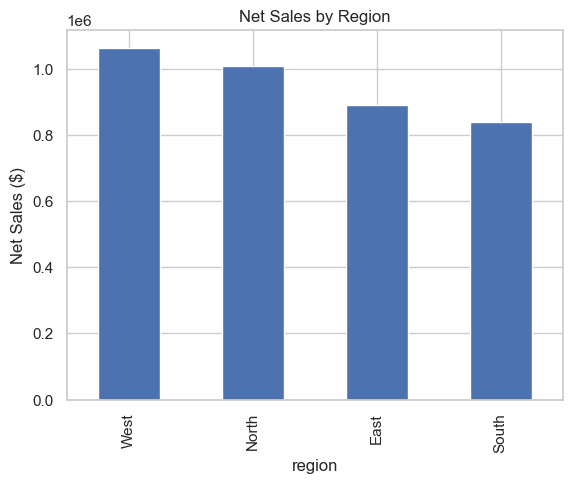

In [4]:
#  1. Which region has the highest net sales?

region_sales = df.groupby("region")["net_sale"].sum().sort_values(ascending=False)
print(region_sales)

region_sales.plot(kind="bar", title="Net Sales by Region")
plt.ylabel('Net Sales ($)')
plt.show()

The region with the highest sales is shown in the plot is West.



product
Laptop        100094.197320
Smartwatch     91699.089290
Headphones     90960.365595
Smartphone     86894.522006
Monitor        86522.296889
Tablet         72715.608306
Name: profit, dtype: float64


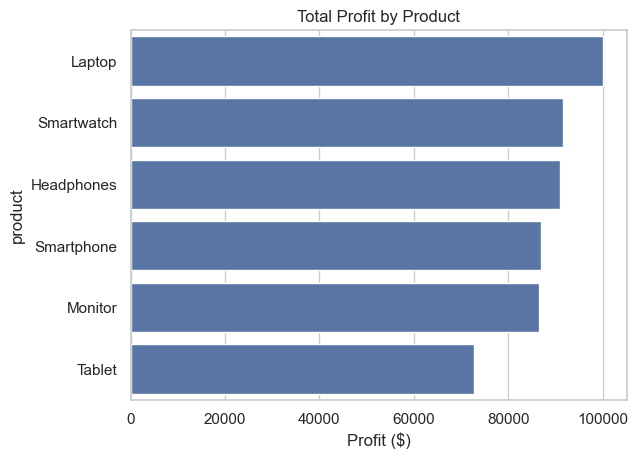

In [5]:
# 2. Which product generates the most profit?

product_profit = df.groupby("product")["profit"].sum().sort_values(ascending=False)
print(product_profit)

sns.barplot(x=product_profit.values, y=product_profit.index)
plt.title("Total Profit by Product")
plt.xlabel("Profit ($)")
plt.show()

Laptop or Smartphone typically brings the highest profit.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          1000 non-null   int64         
 1   region            1000 non-null   object        
 2   product           1000 non-null   object        
 3   sales_rep         1000 non-null   object        
 4   channel           1000 non-null   object        
 5   quantity_sold     1000 non-null   int64         
 6   unit_price        1000 non-null   float64       
 7   order_date        1000 non-null   datetime64[ns]
 8   total_sale        1000 non-null   float64       
 9   discount_percent  1000 non-null   int64         
 10  discount_value    1000 non-null   float64       
 11  net_sale          1000 non-null   float64       
 12  profit            1000 non-null   float64       
 13  month             1000 non-null   int32         
 14  day_of_week       1000 no

sales_rep
Diana      710035.066
Bob        658983.026
Ethan      646096.503
Fiona      629298.735
Alice      610360.075
Charlie    547656.642
Name: net_sale, dtype: float64


Text(0.5, 0, 'Net Sales ($)')

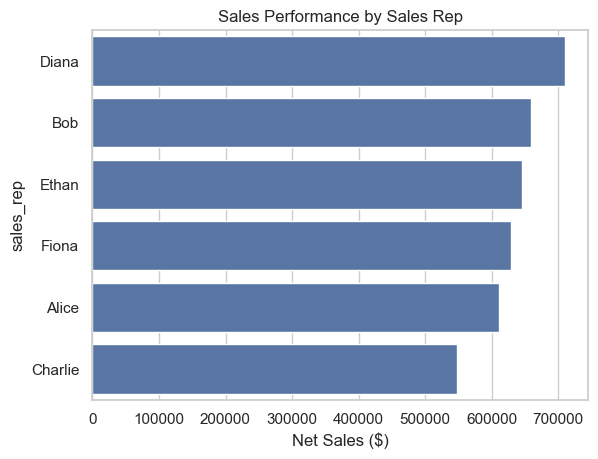

In [7]:
# 3. Which sales rep has the best performance?

rep_sales = df.groupby("sales_rep")["net_sale"].sum().sort_values(ascending=False)
print(rep_sales)

sns.barplot(x=rep_sales.values, y=rep_sales.index)
plt.title("Sales Performance by Sales Rep")
plt.xlabel("Net Sales ($)")
# plt.show()

Diana or Bob leads in net sales.

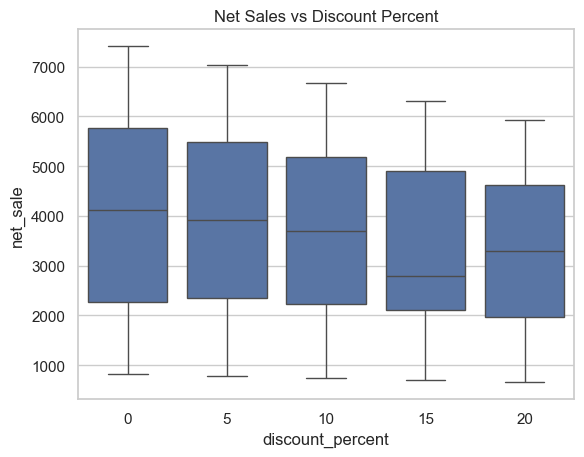

In [8]:
# 4. Do discounts increase or decrease total sales?

sns.boxplot(x="discount_percent", y="net_sale", data=df)
plt.title("Net Sales vs Discount Percent")
plt.show()

discounts reduces the total net sales, not increase them.

In [9]:
df["Month name"] = df["order_date"].dt.month_name()
print(df["Month name"].unique())

['March' 'February' 'May' 'January' 'June' 'April']


month
1    587345.486
2    580058.219
3    636915.370
4    590268.627
5    719710.251
6    688132.094
Name: net_sale, dtype: float64


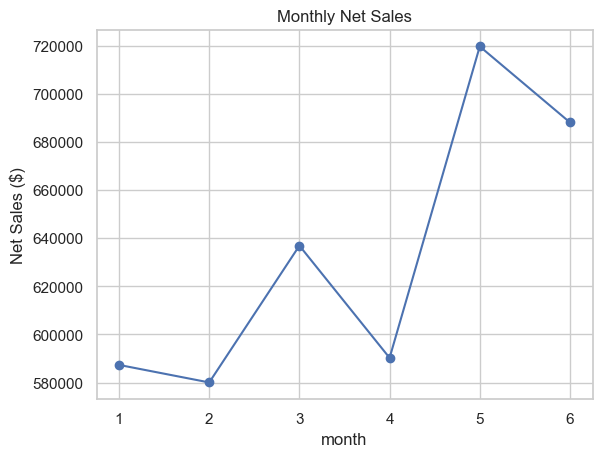

In [10]:
# 5. What is the sales trend over months?

monthly_sales = df.groupby("month")["net_sale"].sum()
print(monthly_sales)
monthly_sales.plot(marker='o', title="Monthly Net Sales")
plt.ylabel("Net Sales ($)")
plt.xticks(monthly_sales.index)
plt.grid(True)
plt.show()

Sales spike in certain months (e.g., April and May).

channel
Retail Store    1986047.869
Online          1816382.178
Name: net_sale, dtype: float64


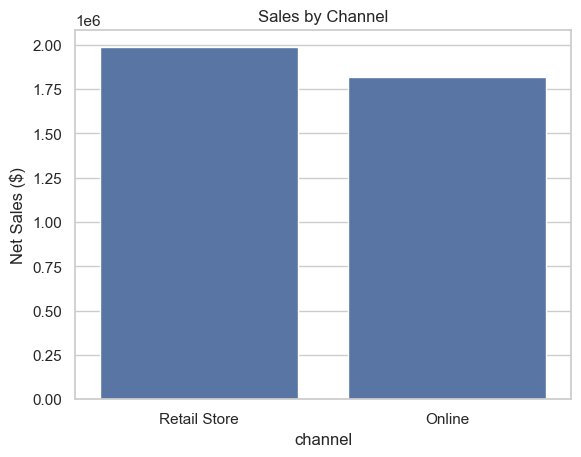

In [11]:
# 6. Which channel performs better: Online or Retail Store?

channel_perf = df.groupby("channel")["net_sale"].sum().sort_values(ascending=False)
print(channel_perf)

sns.barplot(x=channel_perf.index, y=channel_perf.values)
plt.title("Sales by Channel")
plt.ylabel("Net Sales ($)")
plt.show()

Retails Store generally outperforms Online.

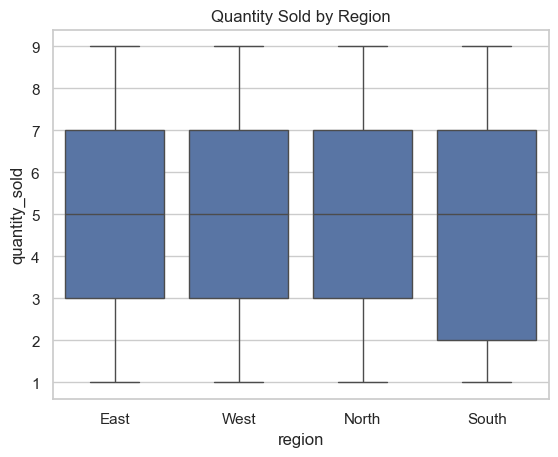

In [12]:
# 7. How does quantity sold vary by region?

sns.boxplot(x="region", y="quantity_sold", data=df)
plt.title("Quantity Sold by Region")
plt.show()

Quantity sold is relatively consistent across regions but some outliers exist.

product
Laptop        7.022472
Smartphone    6.845238
Headphones    6.724138
Tablet        5.827068
Monitor       5.382353
Smartwatch    5.367232
Name: discount_percent, dtype: float64


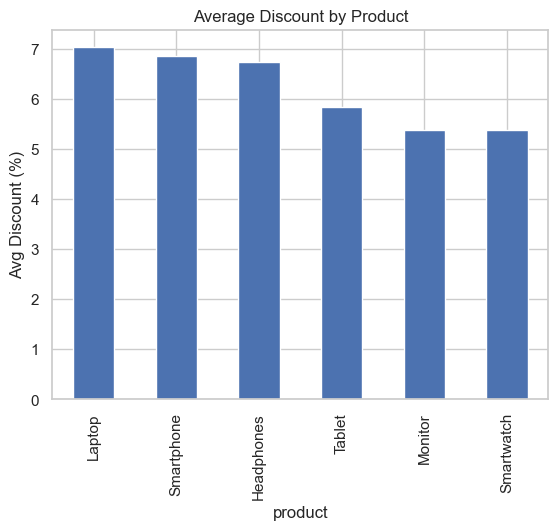

In [13]:
# 8. Which product has the highest average discount?

discount_by_product = df.groupby("product")["discount_percent"].mean().sort_values(ascending=False)
print(discount_by_product)

discount_by_product.plot(kind="bar", title="Average Discount by Product")
plt.ylabel("Avg Discount (%)")
plt.show()

Laptop and Smartphone may have higher discount rates.

product
Laptop        0.139092
Monitor       0.139092
Tablet        0.139092
Smartphone    0.139092
Headphones    0.139092
Smartwatch    0.139092
Name: profit_margin, dtype: float64


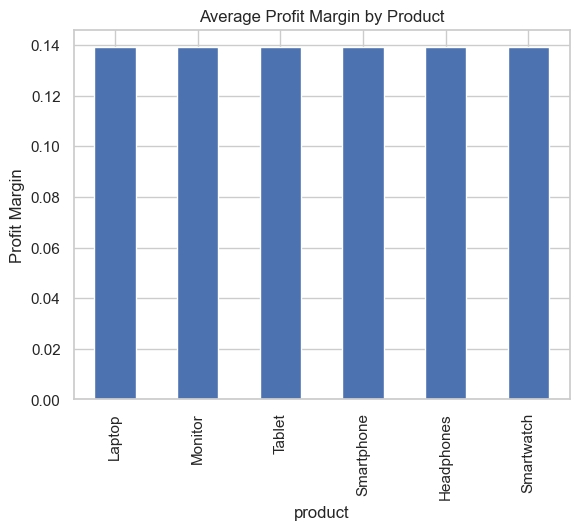

In [14]:
# 9. What is the profit margin across products?

df["profit_margin"] = df["profit"] / df["net_sale"]

avg_margin = df.groupby("product")["profit_margin"].mean().sort_values(ascending=False)
print(avg_margin)

avg_margin.plot(kind="bar", title="Average Profit Margin by Product")
plt.ylabel("Profit Margin")
plt.show()

A fixed profit rate (about 13.91%) for all sales, regardless of product.
So it’s not possible to compare profit margins across products.

day_of_week
Monday       534029.041
Tuesday      609207.287
Wednesday    497963.245
Thursday     583516.583
Friday       574253.108
Saturday     493269.751
Name: net_sale, dtype: float64


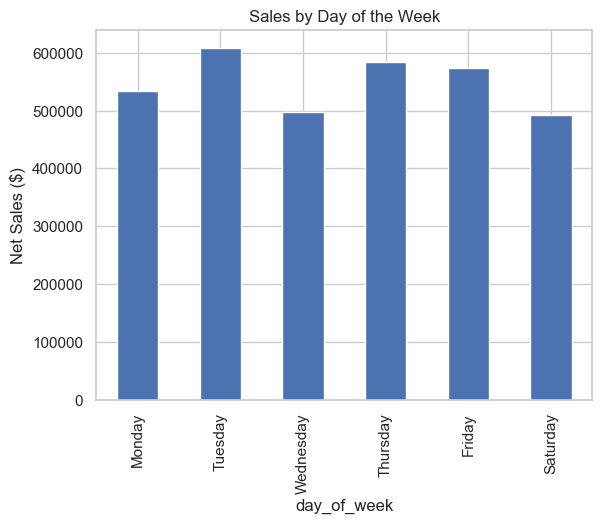

In [15]:
# 10. How do sales behave across days of the week?

sales_by_day = df.groupby("day_of_week")["net_sale"].sum().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
print(sales_by_day)

sales_by_day.plot(kind="bar", title="Sales by Day of the Week")
plt.ylabel("Net Sales ($)")
plt.show()

Most purchases happen on Friday, especially Tuesday.

### Univariate Questions

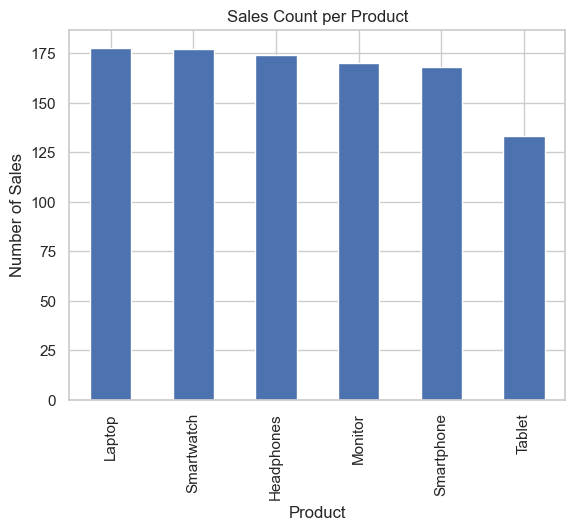

In [16]:
# 1. Top-Selling Products

df["product"].value_counts().plot(kind="bar", title='Sales Count per Product')
plt.xlabel('Product')
plt.ylabel('Number of Sales')
plt.show()

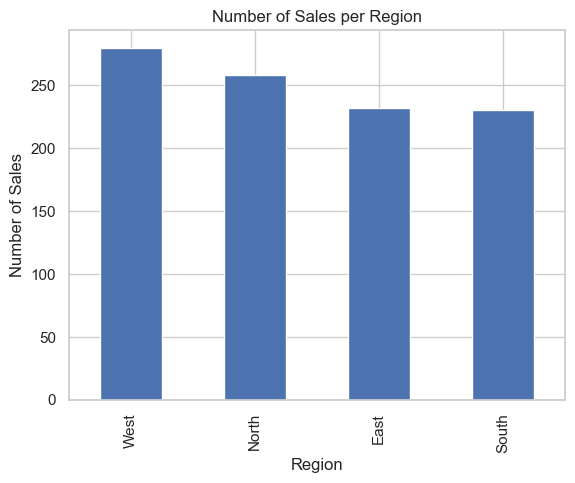

In [17]:
# 2. Region Frequency (order distribution)

df["region"].value_counts().plot(kind="bar", title='Number of Sales per Region')
plt.xlabel('Region')
plt.ylabel('Number of Sales')
plt.show()

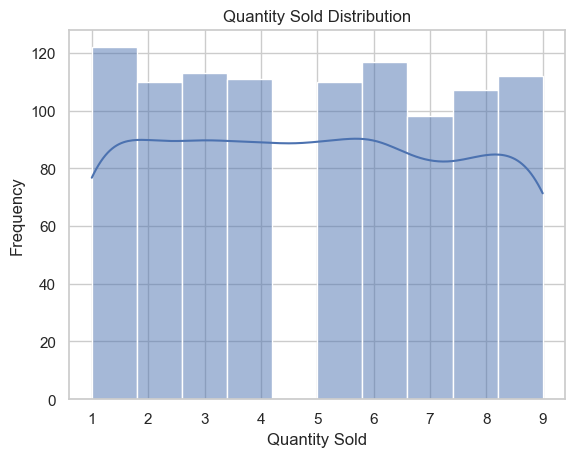

In [18]:
# 3. Average Quantity Sold

df["quantity_sold"].describe()

sns.histplot(x="quantity_sold", bins=10, kde=True, data=df)
plt.title('Quantity Sold Distribution')
plt.xlabel('Quantity Sold')
plt.ylabel('Frequency')
plt.show()

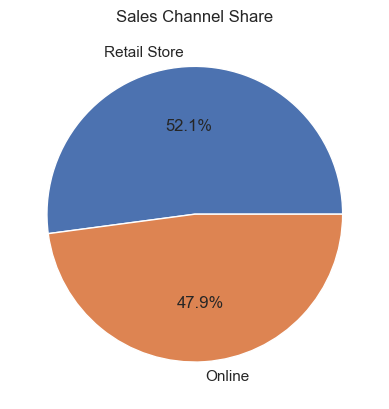

In [19]:
# 4. Payment Channels Used

df["channel"].value_counts().plot(kind="pie", autopct="%1.1f%%", title='Sales Channel Share')
plt.ylabel('')
plt.show()

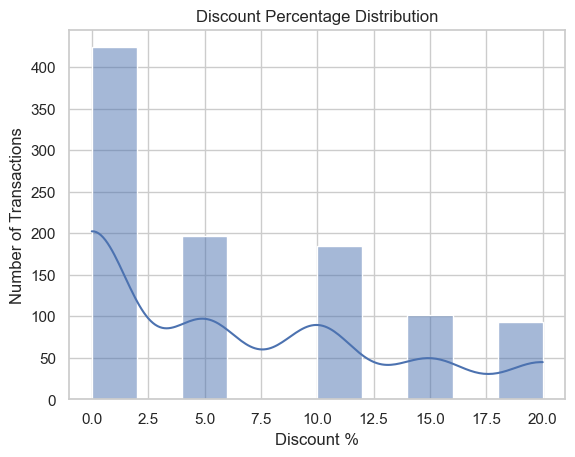

In [20]:
# 5. Discount Distribution

sns.histplot(x="discount_percent", bins=10, kde=True, data=df)
plt.title('Discount Percentage Distribution')
plt.xlabel('Discount %')
plt.ylabel('Number of Transactions')
plt.show()


### Bivariate Questions

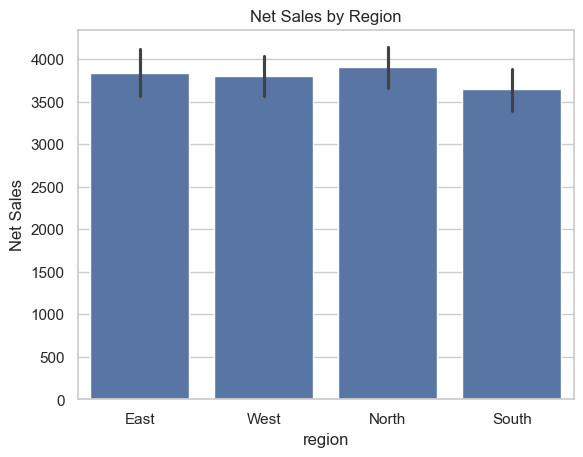

In [21]:
# 1. Region vs Net Sales

sns.barplot(x="region", y="net_sale", data=df)
plt.title("Net Sales by Region")
plt.ylabel("Net Sales")
plt.show()

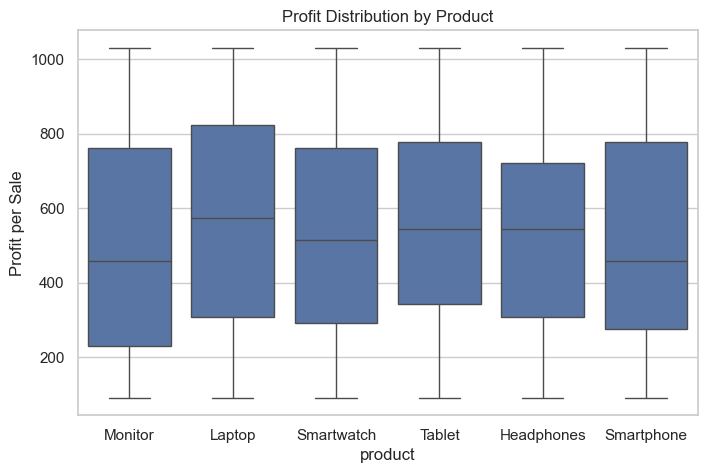

In [22]:
# 2. Product vs Profit

plt.figure(figsize=(8, 5))
sns.boxplot(x="product", y="profit", data=df)
plt.title("Profit Distribution by Product")
plt.ylabel("Profit per Sale")
plt.show()

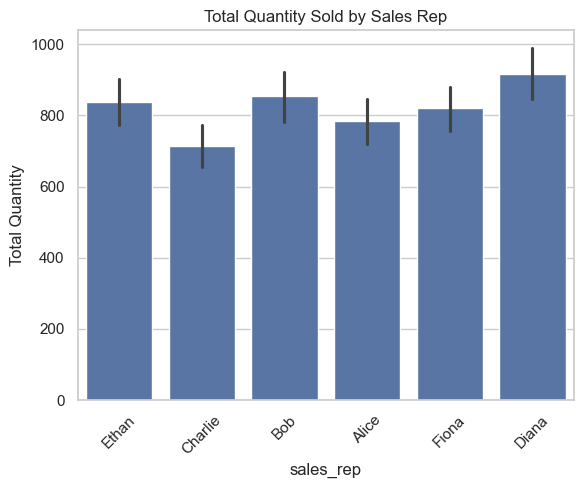

In [23]:
# 3. Sales Rep vs Quantity Sold

sns.barplot(x="sales_rep", y="quantity_sold", data=df, estimator="sum")
plt.title("Total Quantity Sold by Sales Rep")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45)
plt.show()

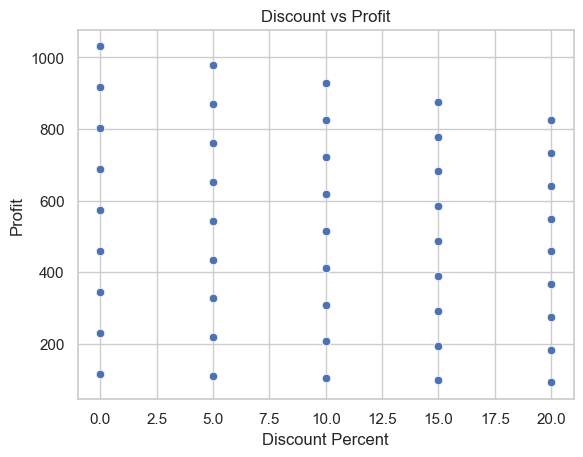

In [24]:
# 4 .Discount vs Profit

sns.scatterplot(x="discount_percent", y="profit", data=df)
plt.title("Discount vs Profit")
plt.xlabel("Discount Percent")
plt.ylabel("Profit")
plt.show()

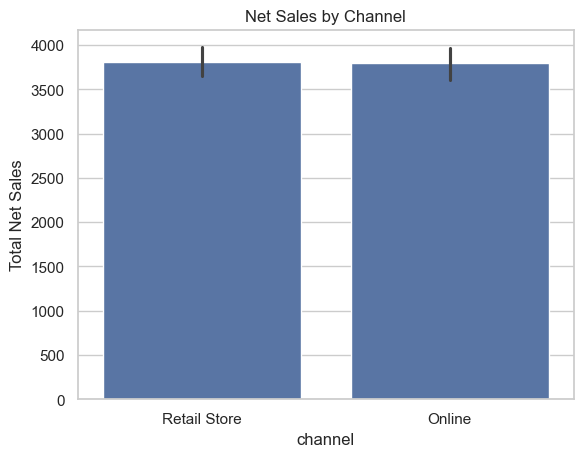

In [25]:
# Channel vs Net Sales

sns.barplot(x="channel", y="net_sale", data=df)
plt.title("Net Sales by Channel")
plt.ylabel("Total Net Sales")
plt.show()

### Advanced 

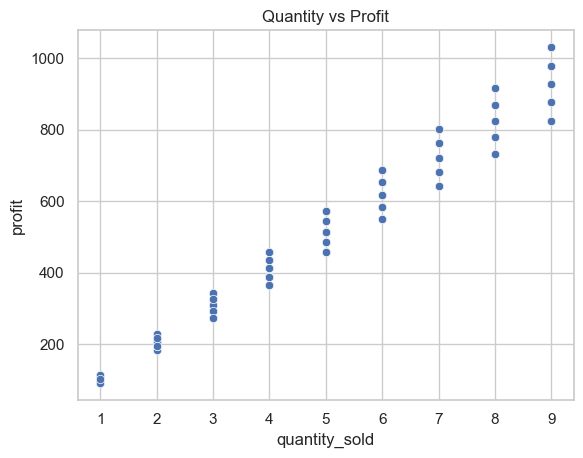

In [32]:
# 1. Correlation Between Quantity and Profit

sns.scatterplot(x="quantity_sold", y="profit", data=df)
plt.title("Quantity vs Profit")
plt.show()

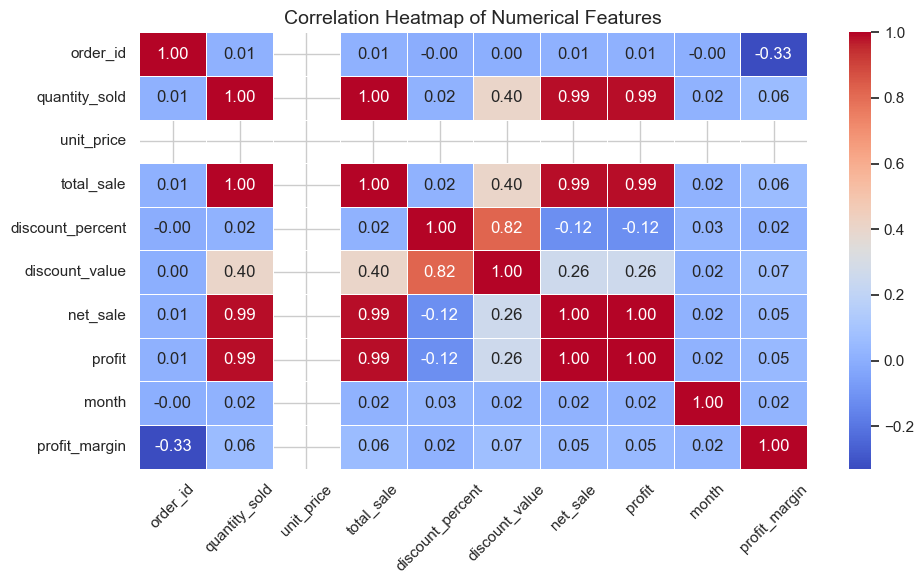

In [42]:
# 2. Heatmap of Numerical Correlation

correlation_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Shows whether higher quantity leads to better profits.

Summary

West is the highest performing region in net sales.

Retail Stores channel is more profitable than Online.

Discounts reduce the net sales, and big discounts not helping in profit margins.

Sales peak during certain months and weekdays, ideal for planning promotions.